### Plots to show in Final Docs

In [1]:
import numpy as np
import ta as ta_lib
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

plt.style.use('seaborn')

### SMA

In [2]:
df = yf.download('EQTL3.SA', period='5y')
df['SMA_10'] = df['Close'].rolling(10).mean()
df['SMA_200'] = df['Close'].rolling(200).mean()
df.dropna(inplace=True)

[*********************100%***********************]  1 of 1 completed


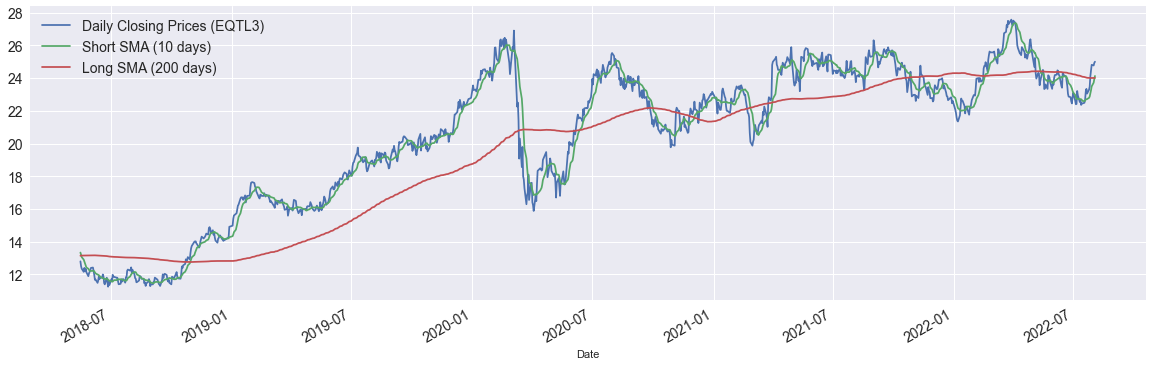

In [3]:
fig, ax = plt.subplots(figsize=(20,6))
df[['Close', 'SMA_10', 'SMA_200']].plot(ax=ax, fontsize=14);
#ax.set_title('SMA vs. EMA on PETR4 Closing Prices')
plt.legend(['Daily Closing Prices (EQTL3)', 'Short SMA (10 days)', 'Long SMA (200 days)'], fontsize=14)
plt.show();

### SMA vs. EMA

In [4]:
df = yf.download('PETR4.SA', period='1y')
df['SMA_10'] = df['Close'].rolling(10).mean()
df['EMA_10'] = ta_lib.trend.ema_indicator(df['Close'], window=10)
df.dropna(inplace=True)

[*********************100%***********************]  1 of 1 completed


In [5]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,SMA_10,EMA_10
Date,,,,,,,,
2021-08-16,29.200001,29.240000,28.240000,28.639999,19.736965,101262100,28.210,28.338415
2021-08-17,26.840000,27.629999,26.450001,27.030001,19.736900,93623700,28.228,28.100522
2021-08-18,27.030001,27.309999,26.650000,26.790001,19.561659,86103100,28.279,27.862245
2021-08-19,26.260000,26.870001,26.129999,26.639999,19.452127,80808200,28.108,27.640019
2021-08-20,26.400000,26.629999,26.170000,26.600000,19.422922,88445600,27.929,27.450924


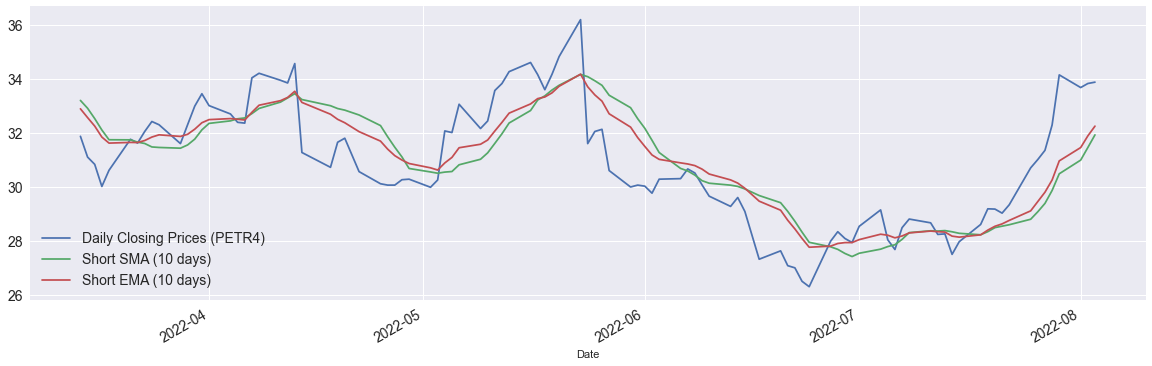

In [6]:
fig, ax = plt.subplots(figsize=(20,6))
df[['Close', 'SMA_10', 'EMA_10']].tail(100).plot(ax=ax, fontsize=14);
#ax.set_title('SMA vs. EMA on PETR4 Closing Prices')
plt.legend(['Daily Closing Prices (PETR4)', 'Short SMA (10 days)', 'Short EMA (10 days)'], fontsize=14)
plt.show();

### Selic vs. IBOV

In [7]:
selic = pd.read_csv('../../data/macro/selic.csv', sep=';')
selic['date'] = pd.to_datetime(selic['date'])
selic['value'] = selic['value'] * 100 * 252
selic.set_index('date', inplace=True)
selic = selic.sort_index(ascending=True)

In [8]:
selic.tail()

,value
date,
2022-07-07,12.357324
2022-07-08,12.357324
2022-07-11,12.357324
2022-07-12,12.357324
2022-07-13,12.357324


In [9]:
selic.loc['2022':].value.mean() / 252 / 100

0.0004298790225563913

In [10]:
ibov = yf.download('^BVSP', period='7y')
ibov

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-08-03,50867.0,50867.0,50054.0,50138.0,50138.0,2613200
2015-08-04,50138.0,50574.0,49827.0,50058.0,50058.0,2670400
2015-08-05,50067.0,50853.0,50067.0,50287.0,50287.0,2662100
2015-08-06,50280.0,50534.0,49624.0,50011.0,50011.0,3640800
2015-08-07,50013.0,50013.0,48512.0,48577.0,48577.0,3218400
...,...,...,...,...,...,...
2022-07-28,101437.0,102686.0,101045.0,102597.0,102597.0,11130000
2022-07-29,102597.0,103989.0,102514.0,103165.0,103165.0,12934200
2022-08-01,103165.0,103317.0,101764.0,102225.0,102225.0,11626700


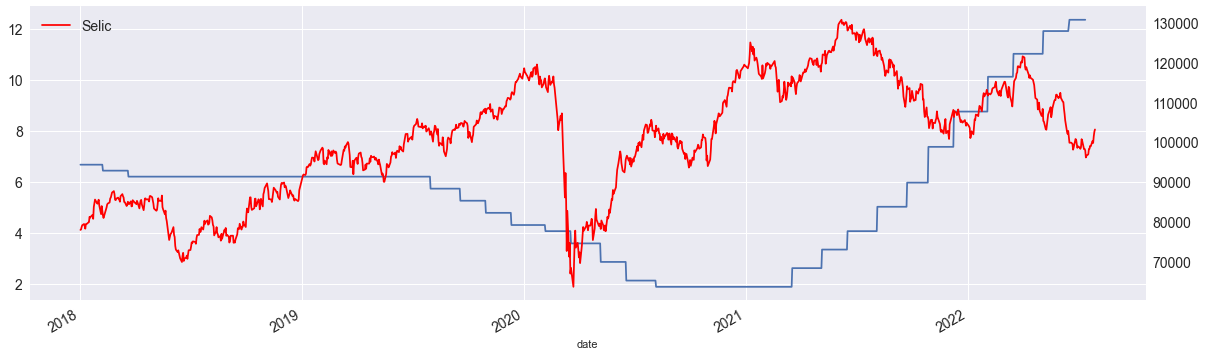

In [36]:
fig, ax1 = plt.subplots(figsize=(20,6), sharex=True)

ax2 = ax1.twinx()

# Selic
selic.loc['2018':'2022-07'].value.plot(ax=ax1, fontsize=14)

# Ibovespa
ibov.loc['2018':'2022-07'].Close.plot(ax=ax2, fontsize=14, color='red')

plt.legend(['Selic', 'Ibovespa'], fontsize=14, loc='upper left')
plt.grid(False)

plt.show();

### Bollinger Bands (BBANDS)

[*********************100%***********************]  1 of 1 completed


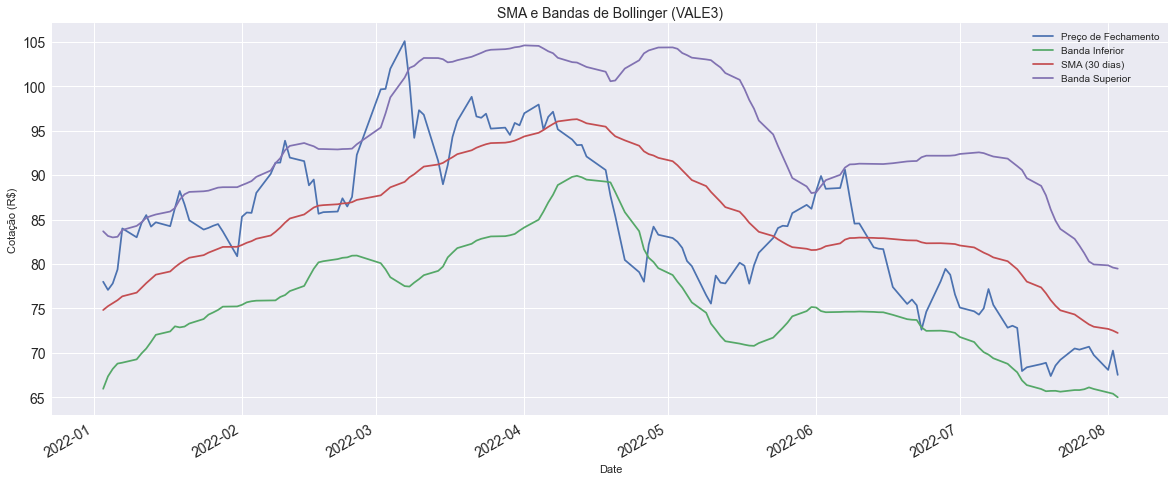

In [12]:
n_days = 30
desvio = 2

data = yf.download('VALE3.SA', period='1y')
data.dropna(inplace=True)

data["SMA"] = data["Close"].rolling(n_days).mean()
data["Lower"] = data["SMA"] - data["Close"].rolling(n_days).std() * desvio # Lower Band -2 Std Dev
data["Upper"] = data["SMA"] + data["Close"].rolling(n_days).std() * desvio # Upper Band +2 Std Dev

data.dropna(inplace=True)

data.loc['2022':][['Close', 'Lower', 'SMA', 'Upper']].plot(figsize=(20,8), fontsize=14)
plt.legend(['Preço de Fechamento', 'Banda Inferior', 'SMA (30 dias)', 'Banda Superior'])
plt.title('SMA e Bandas de Bollinger (VALE3)', fontsize=14)
plt.ylabel('Cotação (R$)')
plt.show();

### MACD

[*********************100%***********************]  1 of 1 completed


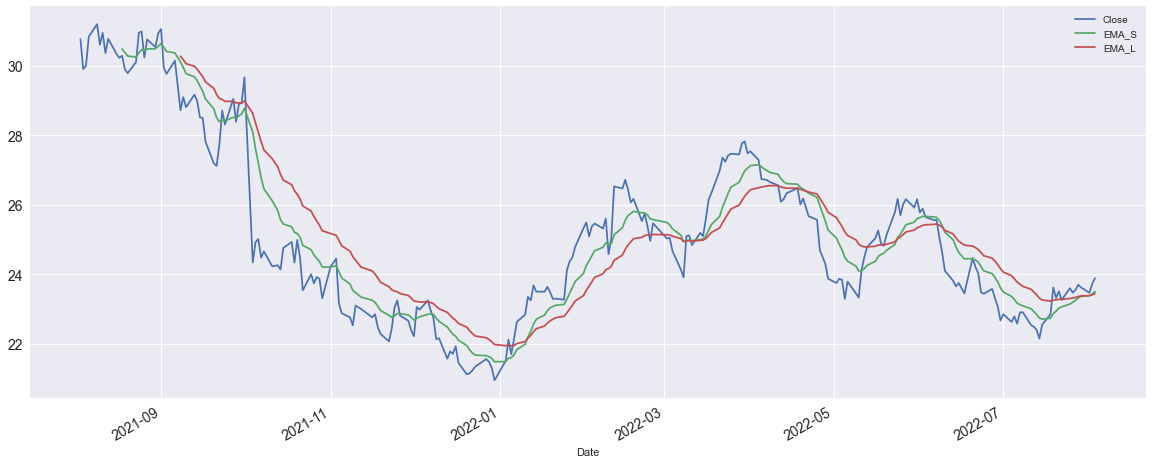

In [13]:
ema_s = 12 # EMA Short
ema_l = 26 # EMA Long

data = yf.download('ITUB4.SA', period='1y')
data.dropna(inplace=True)

data["EMA_S"] = data.Close.ewm(span = ema_s, min_periods = ema_s).mean()
data["EMA_L"] = data.Close.ewm(span = ema_l, min_periods = ema_l).mean()

data["MACD"] = data.EMA_S - data.EMA_L

signal_mw = 9 # Moving Window for Signal Line
data["MACD_Signal"] = data.MACD.ewm(span = signal_mw, min_periods = signal_mw).mean() 

data[["Close", "EMA_S", "EMA_L"]].plot(figsize=(20,8), fontsize=14)
plt.show()

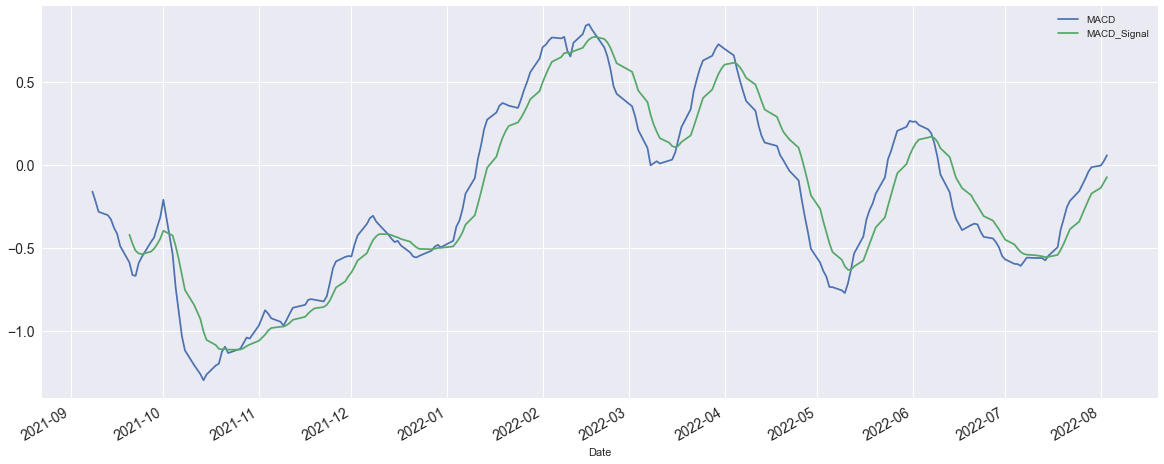

In [14]:
data[["MACD", "MACD_Signal"]].plot(figsize=(20,8), fontsize=14)
plt.show()